In [1]:
import pandas as pd
import numpy as np
import numpy.random as nr
import random
import sys
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import feature_selection as fs

from copy import deepcopy

In [2]:
df = pd.read_csv('../data/climate_data_cleaned.csv')

In [3]:
df

,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4.099473e+06
1,ARE,1991,1594.0,0.076475,245.977706,12262.388130,57010.849,29.851550,598.807980,26.377204,0.266886,3.391964e+10,19340.0,20.5,5.442852,1909812.0,5.265704,1.507988e+06
2,ARG,1991,2666.1,1.285579,173.122857,1434.960601,117021.304,3.536073,426.614517,39.119646,4.772468,1.897200e+11,3960.0,25.8,1.372593,33093579.0,1.762636,2.890393e+07
3,AUS,1991,1603.3,1.306912,208.686644,4926.727783,281530.258,16.288490,689.948873,60.356798,7.915273,3.299655e+11,18380.0,8.6,1.274577,17284000.0,1.438378,1.478473e+07
4,AUT,1991,5463.0,0.209142,128.939160,3381.073790,65888.656,8.448456,322.186648,19.746121,20.991143,1.721664e+11,21200.0,8.9,1.134999,7798899.0,1.134999,5.131676e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,VNM,2008,5064.2,10.611056,266.177197,694.872260,127384.246,1.496485,573.242319,12.016197,6.166789,9.027376e+10,920.0,25.2,1.064356,85122300.0,2.803530,2.369805e+07
1696,YEM,2008,939.1,5.775544,142.167696,320.226397,23384.459,1.033494,458.830121,9.356326,0.520661,2.691736e+10,970.0,81.1,3.049598,22626595.0,4.960694,6.932789e+06
1697,ZAF,2008,4055.3,3.503662,320.191041,3074.597450,435877.955,8.933203,930.310881,33.234023,6.859550,2.752787e+11,5860.0,65.6,1.104057,48793022.0,1.897450,2.963688e+07
1698,ZAR,2008,771.5,14.798970,1193.887219,356.023405,2816.256,0.045078,151.165020,17.352516,9.986567,1.166838e+10,160.0,174.4,2.763286,62474901.0,4.605834,2.121648e+07


### Descriptive Statistics

In [4]:
df.describe()

,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1.700000e+03
mean,1999.570588,3013.317581,2.948940,249.822736,1968.979736,9.793999e+05,4.676663,482.303784,21.480126,12.201789,1.058568e+12,7898.668664,51.971955,1.451313,3.060142e+08,2.252231,1.347903e+08
std,5.143070,1796.206082,3.949722,186.195019,1959.419972,3.235692e+06,4.906273,392.192230,12.105158,9.116682,3.921323e+12,11592.516937,51.332162,1.129312,9.482329e+08,1.642009,4.145755e+08
min,1991.000000,175.700000,-15.027675,66.335372,116.511476,7.077310e+02,0.029411,45.552592,3.526316,0.000000,9.826326e+08,80.000000,3.200000,-2.397174,1.909812e+06,-2.757210,1.151309e+06
25%,1995.000000,1683.364736,0.834105,136.320490,542.882788,1.462125e+04,0.922769,257.139562,12.383953,5.839844,1.636221e+10,780.000000,10.000000,0.630306,9.973065e+06,0.925308,5.469794e+06
50%,2000.000000,2584.800000,1.993220,197.624918,1089.225939,7.728386e+04,3.093346,368.415567,18.525960,10.293791,9.882942e+10,2150.770301,32.350000,1.519890,2.689207e+07,2.315122,1.423239e+07
75%,2004.000000,3933.400000,3.702149,286.474936,2893.996077,3.708446e+05,7.441195,586.972993,28.988324,16.599298,4.122600e+11,9205.000000,79.925741,2.276853,8.234386e+07,3.364747,4.835246e+07
max,2008.000000,8410.800000,51.373951,1383.380011,12607.839262,3.064936e+07,37.106499,3343.454250,60.505780,53.749825,5.580488e+13,58620.000000,239.100000,11.180657,6.610030e+09,12.829046,3.264974e+09


In [5]:
df.head()

,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4.099473e+06
1,ARE,1991,1594.0,0.076475,245.977706,12262.388130,57010.849,29.851550,598.807980,26.377204,0.266886,3.391964e+10,19340.0,20.5,5.442852,1909812.0,5.265704,1.507988e+06
2,ARG,1991,2666.1,1.285579,173.122857,1434.960601,117021.304,3.536073,426.614517,39.119646,4.772468,1.897200e+11,3960.0,25.8,1.372593,33093579.0,1.762636,2.890393e+07
3,AUS,1991,1603.3,1.306912,208.686644,4926.727783,281530.258,16.288490,689.948873,60.356798,7.915273,3.299655e+11,18380.0,8.6,1.274577,17284000.0,1.438378,1.478473e+07
4,AUT,1991,5463.0,0.209142,128.939160,3381.073790,65888.656,8.448456,322.186648,19.746121,20.991143,1.721664e+11,21200.0,8.9,1.134999,7798899.0,1.134999,5.131676e+06


In [6]:
#Removing outlier in the data 
df = df[df['country']!='ARE']

print("Shape of data now")
df.shape

Shape of data now


(1686, 18)

In [7]:
df['country'].nunique()

95

In [8]:
df.year.value_counts()

2000    95
2002    95
2007    95
2006    95
1996    95
1997    95
2004    95
1999    95
2003    95
2001    95
2005    94
2008    94
1998    94
1995    94
1994    93
1993    93
1992    91
1991    83
Name: year, dtype: int64

In [9]:
df_2008 = df[df.year==2008]
df_2008.shape

(94, 18)

In [10]:
df_modelling = df[df.year!=2008]
df_modelling.shape

(1592, 18)

### Update the model with the features selected from data exploration

In [11]:
# Feature selection
feature_cols = ['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc',
                    'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']
label_col = ['co2_per_cap']

features = np.array(df_modelling[feature_cols])
labels =  np.array(df_modelling[label_col])

In [12]:
#Data split
random.seed(1)
# features_train, features_test, labels_train, labels_test = train_test_split(features,
#                                                                             labels,
#                                                                             test_size=0.7)

In [13]:
features_train = features
features_test = np.array(df_2008[feature_cols])
labels_train = labels
labels_test = np.array(df_2008[label_col])

### Feature selection

In [14]:
from xgboost import XGBRegressor
import random

In [15]:
random.seed(42)

In [16]:
# Define the model
rf_selector = RandomForestRegressor() 

##xgb
xg_selector = XGBRegressor()

In [17]:
def featureSelector(model):
    feature_folds = ms.KFold(n_splits=5, shuffle = True)
    
    # Define an objects for a model for recursive feature elimination with CV
    selector = fs.RFECV(estimator = model, cv = feature_folds, scoring = 'r2', n_jobs=-1)

    selector = selector.fit(features_train, np.ravel(labels_train))
    selector.support_

    print("Feature ranking after RFECV:")
    print(selector.ranking_)

    # print the important features
    ranks_transform = list(np.transpose(selector.ranking_))
    chosen_features = [i for i,j in zip(feature_cols,ranks_transform) if j==1]
    print("Chosen important features:")
    print(chosen_features)
    
    return selector

In [18]:
selector = featureSelector(xg_selector)

Feature ranking after RFECV:
[5 6 2 1 1 1 3 1 4]
Chosen important features:
['en_per_cap', 'pop_urb_aggl_perc', 'prot_area_perc', 'pop_growth_perc']


In [19]:
# assign only the important variables to the features array of both training and testing dataset
features_train_reduced = selector.transform(features_train)
features_test_reduced = selector.transform(features_test)

print("Training subset shape before the recursive feature elimination:")
print(features_train.shape)
print("Training subset array shape after the recursive feature elimination:")
print(features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination:")
print(features_test_reduced.shape)

Training subset shape before the recursive feature elimination:
(1592, 9)
Training subset array shape after the recursive feature elimination:
(1592, 4)
Test subset array shape after the recursive feature elimination:
(94, 4)


### Perform hyper parameter tuning

In [20]:
def findparameters(tuner, param_grid, model_type):
    inside_folds = ms.KFold(n_splits=5, shuffle = True)
    model = ms.RandomizedSearchCV(estimator=tuner, param_distributions = param_grid, refit=True,
                                 cv=inside_folds, scoring = 'r2', return_train_score=True, n_jobs=-1)
    # Fit the grid search model object with cross-validation on the data
    model.fit(features_train_reduced, np.ravel(labels_train))

    # Print the best parameter value
    print("max_depth: ", model.best_estimator_.max_depth)
    print("best number of estimators: ", model.best_estimator_.n_estimators)
    if model_type=="xgb":
        print("best colsample_bytree: ", model.best_estimator_.colsample_bytree)
        print("best learning_rate: ", model.best_estimator_.learning_rate) 
        
    else:        
        print("best max_features: ", model.best_estimator_.max_features)        
        print("min_samples_split: ", model.best_estimator_.min_samples_split)
        print("min_samples_leaf: ", model.best_estimator_.min_samples_leaf)
        
    return model.best_estimator_

In [21]:
# Define value ranges for each hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

# Create the hyperparameter grid
rf_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [22]:
xgb_param_grid = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

In [26]:
xg_tuner = XGBRegressor()

In [27]:
best_model = findparameters(xg_tuner, xgb_param_grid, "xgb")

max_depth:  6
best number of estimators:  1000
best colsample_bytree:  0.7
best learning_rate:  0.1


### Evaluate the best model

In [28]:
outside_folds = ms.KFold(n_splits=10, shuffle = True)

# cv_eval = cross_val_score(rf_best_model, features_train_reduced, labels_train, cv = outside_folds, n_jobs=-1)
cv_eval = cross_val_score(best_model, features_train_reduced, labels_train, cv = outside_folds, n_jobs=-1)

print('Mean R2 score of all CV folds = %4.3f' % np.mean(cv_eval))
print('Standard deviation of the R2 score over all folds = %4.3f' % np.std(cv_eval))
print('R2 score for each fold:')

# print the R2 score for each fold
for i, j in enumerate(cv_eval):
    print('Fold %2d    %4.3f' % (i+1, j))

Mean R2 score of all CV folds = 0.980
Standard deviation of the R2 score over all folds = 0.009
R2 score for each fold:
Fold  1    0.956
Fold  2    0.989
Fold  3    0.984
Fold  4    0.982
Fold  5    0.974
Fold  6    0.984
Fold  7    0.977
Fold  8    0.976
Fold  9    0.984
Fold 10    0.991


#### Make predictions and evaluate

In [29]:
# make predictions from the features of the testing subset
predictions = best_model.predict(features_test_reduced)

# import the functions for the metrics evaluation
from sklearn.metrics import r2_score, mean_squared_error

# calculate the metrics basing on the predicted and true values for the test subset
r2 = r2_score(y_true=labels_test, y_pred=predictions)
mse = mean_squared_error(y_true=labels_test, y_pred=predictions)
rmse = np.sqrt(mse)

print("R2=")
print(r2)
print("Mean Squared Error: MSE=")
print(mse)
print("Root Mean Squared Error: RMSE=")
print(rmse)

R2=
0.9600535997739442
Mean Squared Error: MSE=
0.7592222693202083
Root Mean Squared Error: RMSE=
0.8713336153966564


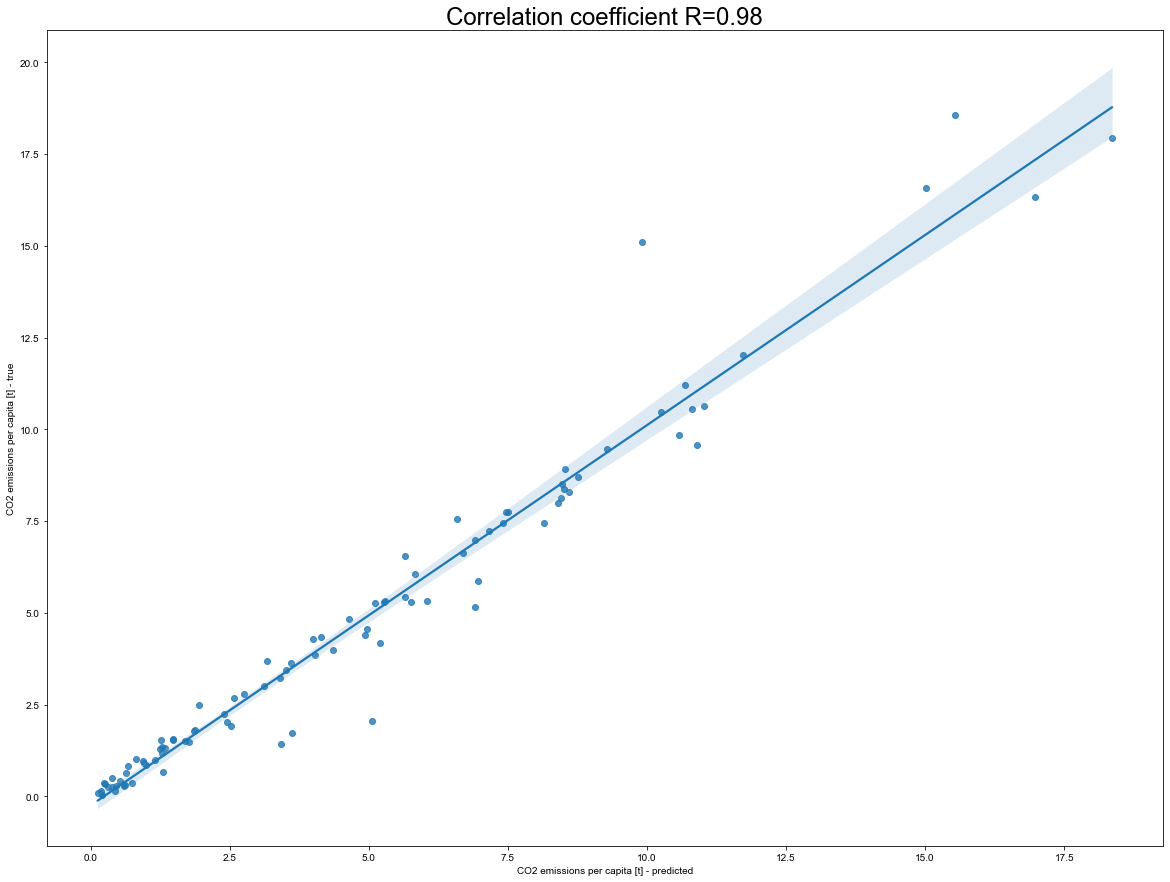

In [30]:
# plot predicted vs true values of the test subset

f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions, y=np.transpose(labels_test)[0,:], fit_reg=True)
plt.xlabel("CO2 emissions per capita [t] - predicted")
plt.ylabel("CO2 emissions per capita [t] - true")
plt.title("Correlation coefficient R="+str(round(np.corrcoef(predictions,np.transpose(labels_test)[0,:])[0,1],2)))
plt.show()

In [31]:
len(predictions)

94

In [32]:
len(df_2008.country.values)

94

In [33]:
output = {'country':[], 'co2_per_cap':[]}
output['country'] = df_2008.country.values
output['co2_per_cap'] = predictions

In [34]:
output_predictions = pd.DataFrame.from_dict(output)
output_predictions["year"] = 2008
output_predictions.head()

,country,co2_per_cap,year
0,AGO,1.292831,2008
1,ARG,4.641848,2008
2,ARM,1.868961,2008
3,AUS,15.537210,2008
4,AUT,8.453272,2008


In [35]:
# output_predictions.to_csv("../data/predictions_2008_.csv", index = False)

# Save a model for geojson

In [36]:
output_model = pd.concat([df_modelling[['country', 'year', 'co2_per_cap']], output_predictions[['country', 'year', 'co2_per_cap']]], axis = 0)

In [37]:
output_model.head()

,country,year,co2_per_cap
0,AGO,1991,0.409949
2,ARG,1991,3.536073
3,AUS,1991,16.288490
4,AUT,1991,8.448456
5,BGD,1991,0.147913


## Convert to required format for geojson

In [38]:
# pip install geopy

In [39]:
import geopy

#### import the master list of countries and coordinates

In [40]:
master_country_list = pd.read_csv("../data/master_countries_codes_and_coordinates.csv")
master_country_list.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,AF,AFG,4,33.0000,65.0
1,Albania,AL,ALB,8,41.0000,20.0
2,Algeria,DZ,DZA,12,28.0000,3.0
3,American Samoa,AS,ASM,16,-14.3333,-170.0
4,Andorra,AD,AND,20,42.5000,1.6


In [41]:
master_country_list["Alpha-3 code"] = master_country_list["Alpha-3 code"].str.strip()

In [42]:
geojson_helpful = output_model.pivot(index='country', columns='year', values='co2_per_cap').reset_index()

In [43]:
geojson_helpful.columns

Index(['country',      1991,      1992,      1993,      1994,      1995,
            1996,      1997,      1998,      1999,      2000,      2001,
            2002,      2003,      2004,      2005,      2006,      2007,
            2008],
      dtype='object', name='year')

In [44]:
geojson_helpful.shape

(95, 19)

In [45]:
geojson_helpful.head(10)

year,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,AGO,0.409949,0.401597,0.510141,0.331321,0.909699,0.842489,0.577043,0.556263,0.677678,0.685141,0.676401,0.850599,0.587864,1.177717,1.161767,1.308968,1.435174,1.292831
1,ARG,3.536073,3.620969,3.490348,3.583651,3.515906,3.661896,3.770914,3.810024,3.981503,3.820041,3.765786,3.489544,3.745910,4.042704,4.108565,4.497975,4.666922,4.641848
2,ARM,NaN,1.067169,0.869320,0.901555,1.083089,0.821906,1.045764,1.095700,0.989534,1.126529,1.155428,0.981120,1.120269,1.190160,1.418502,1.426261,1.644924,1.868961
3,AUS,16.288490,16.830891,17.100628,17.023670,17.011617,17.981537,18.017155,18.540584,17.199792,17.209034,16.734123,17.372691,17.414905,17.350630,18.014056,18.232863,18.071623,15.537210
4,AUT,8.448456,7.777838,7.342097,7.263011,7.622574,7.665513,7.697782,7.961092,7.717385,7.712474,7.912097,8.055603,8.908437,8.822206,9.034664,8.708347,8.289284,8.453272
5,BGD,0.147913,0.161018,0.154531,0.164867,0.194201,0.200368,0.204820,0.192630,0.198347,0.215025,0.245931,0.250991,0.247771,0.286624,0.267824,0.327665,0.326002,0.618715
6,BGR,6.916832,6.276410,8.183227,6.621033,7.119655,6.784564,6.458226,6.175766,5.358431,5.400863,5.872763,5.672223,6.047292,6.012888,6.189919,6.357101,6.894747,6.696382
7,BLR,NaN,8.563752,7.271325,6.445128,6.093681,5.920978,5.883076,5.720287,5.562439,5.344181,5.275267,5.278633,5.440725,5.926117,6.039774,6.350607,6.210693,5.653728
8,BOL,0.848156,0.953271,1.126063,1.219450,1.261449,1.143654,1.261124,1.295442,1.200286,1.145931,1.041694,0.965239,1.306923,1.183020,1.125359,1.124530,1.379460,1.343858
9,BRA,1.441571,1.427757,1.469806,1.519173,1.702608,1.833026,1.924860,1.853569,1.873188,1.892645,1.921640,1.869526,1.787963,1.855444,1.881677,1.875639,1.940844,5.065936


In [46]:
geojson_helpful.shape

(95, 19)

In [47]:
geojson_mapped = geojson_helpful.merge(master_country_list[["Alpha-3 code", "Latitude (average)", "Longitude (average)"]],
                      left_on = "country", right_on = "Alpha-3 code", how = "left")

In [48]:
geojson_mapped[geojson_mapped["Alpha-3 code"].isnull()]

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,Alpha-3 code,Latitude (average),Longitude (average)
26,ECA,NaN,9.829773,8.940722,7.798269,7.555305,7.370451,6.898540,6.701008,6.671719,...,6.792994,7.059388,7.142038,7.199710,7.465501,7.615263,7.465083,NaN,NaN,NaN
29,EMU,8.880847,8.635643,8.377932,8.330878,8.523267,8.678262,8.519588,8.664309,8.253499,...,8.402933,8.544141,8.540462,8.438726,8.336832,8.188403,8.396807,NaN,NaN,NaN
52,LAC,2.252215,2.260864,2.295517,2.360915,2.373977,2.426226,2.504088,2.564560,2.577965,...,2.525800,2.527098,2.526240,2.576659,2.605362,2.691532,2.760113,NaN,NaN,NaN
53,LIC,0.647485,0.646450,0.639954,0.613029,0.606058,0.600088,0.549339,0.262784,0.274070,...,0.266820,0.267983,0.279985,0.285820,0.297390,0.280294,0.456298,NaN,NaN,NaN
54,LMC,1.193126,1.277219,1.233060,1.187095,1.202409,1.233333,1.222969,1.194718,1.234531,...,1.299649,1.349875,1.391997,1.410375,1.424489,1.498016,1.475605,NaN,NaN,NaN
55,LMY,2.271417,2.322447,2.282576,2.235425,2.271164,2.297133,2.257728,2.153103,2.146746,...,2.221503,2.421462,2.594118,2.699128,2.831227,2.937485,3.124093,NaN,NaN,NaN
58,MIC,2.489368,2.550162,2.507884,2.460110,2.504043,2.536793,2.501319,2.425211,2.418975,...,2.514244,2.747276,2.947801,3.071670,3.226185,3.355652,3.518589,NaN,NaN,NaN
59,MNA,2.586103,2.696537,2.651333,2.910475,2.923484,2.878213,2.868105,3.079975,2.998499,...,3.105511,3.371350,3.452129,3.564319,3.677710,3.738807,4.026757,NaN,NaN,NaN
72,ROM,5.931889,5.487868,5.367308,5.138736,5.666623,5.654427,5.142645,4.607419,3.991444,...,4.227545,4.412642,4.398393,4.389341,4.724979,4.567822,4.925207,NaN,NaN,NaN
75,SAS,0.723666,0.754265,0.769196,0.803593,0.836214,0.895675,0.913117,0.918849,0.960687,...,0.988261,1.014809,1.057954,1.088704,1.147740,1.213724,1.247027,NaN,NaN,NaN


#### Retain only columns that have a valid latitude and longitude

In [49]:
geojson_mapped = geojson_mapped[geojson_mapped['Alpha-3 code'].notna()]

In [50]:
geojson_mapped.drop(columns = ["Alpha-3 code"], inplace = True)

In [51]:
geojson_mapped.shape

(87, 21)

In [52]:
geojson_mapped.drop_duplicates(inplace = True)
geojson_mapped.shape

(81, 21)

##### Rename columns

In [53]:
geojson_mapped.rename(columns = {"Latitude (average)": "latitude", "Longitude (average)":"longitude"}, inplace = True)

In [54]:
geojson_mapped.to_csv("../data/geojson_convertible.csv", index = False)